# O Dataset e o Projeto: Housing California
<hr>
<p> Thomas Bekhor, João Bresser, Marcos Paulo Ricarte</p>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O dataset é o conjunto de dados de imóveis da Califórnia, que contém dados extraídos do censo de 1990 dos EUA. Os dados foram divididos em blocos que, em média, possuem aproximidamente 1.425,5 indivíduos, cada um, que vivem em uma área compactada. A latitude e longitude significam o centróide de cada área do bloco. Os dados finais contêm 20.640 observações sobre nove características. </p>


### Features do Dataset:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>longitude (ponto flutuante 64)</b> - Uma medida do oeste de uma casa. Um valor mais negativo está mais a oeste. </li>
    <li><b>latitude (ponto flutuante 64)</b> - Uma medida do norte mais alto de uma casa; um valor maior é mais ao norte. </li>
    <li><b>housing_median_age (ponto flutuante 64)</b> - Idade mediana de uma casa em um bloco; residências novas que ainda não têm moradores, diminuem o valor dessa variável. </li>
    <li><b>total_rooms (ponto flutuante 64)</b> - Número total de salas em um bloco. </li>
    <li><b>total_bedrooms (ponto flutuante 64)</b> - Número total de quartos em um bloco. </li>
    <li><b>population (ponto flutuante 64)</b> - Número total de pessoas que residem em um bloco. </li>
    <li><b>households (ponto flutuante 64)</b> - Número total de unidade residencial para cada bloco. </li>
    <li><b>median_income (ponto flutuante 64)</b> - Renda mediana para famílias em um bloco de casa, medido em dezenas de milhares de dólares americanos. </li>
    <li><b>median_house_value (ponto flutuante 64)</b> - Valor mediano da casa para casas em um bloco, medido em dólares.</li>
    <li><b>ocean_proximity (object)</b> - Proximidade do oceano. </li>
</ul>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset. Através de uma exploração das correlações, e verificação de outliers, adaptação das variáveis, no final do projeto teremos um modelo de regressão acurado para o valor mediano de uma casa (target) na região segundo os inputs de um conjunto de variáveis.</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

# <font color='red' style='font-size: 30px;'>1-Importando bibliotecas</font>
<hr style='border: 2px solid red;'>

In [40]:
! pip install xgboost

In [41]:
#bibliotecas matemáticas e gráficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#separação entre treino e teste
from sklearn.model_selection import train_test_split

#separação estratificada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

#resultados da modelagem
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#fazer o cross validation
from sklearn.model_selection import cross_val_score

#encontrando os melhores features
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

#serializar modelo
import joblib

#tuning de hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# <font color='red' style='font-size: 30px;'>2-Primeiro encontro com o DataSet</font>
<hr style='border: 2px solid red;'>

Lendo a base de dados

In [42]:
df_house = pd.read_csv("DATA1_housing.csv")

Entendendo como é o DataFrame

In [43]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Vendo as informações do nosso DataFrame

In [44]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Explorando mais um pouco cada feature numérico. O eixo vertical representa o numero de aparições e o eixo horizontal representa o número do range de valores escolhidos (no caso seria o BINS, que é calculado a partir da quantidade de linhas do DataFrame). 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

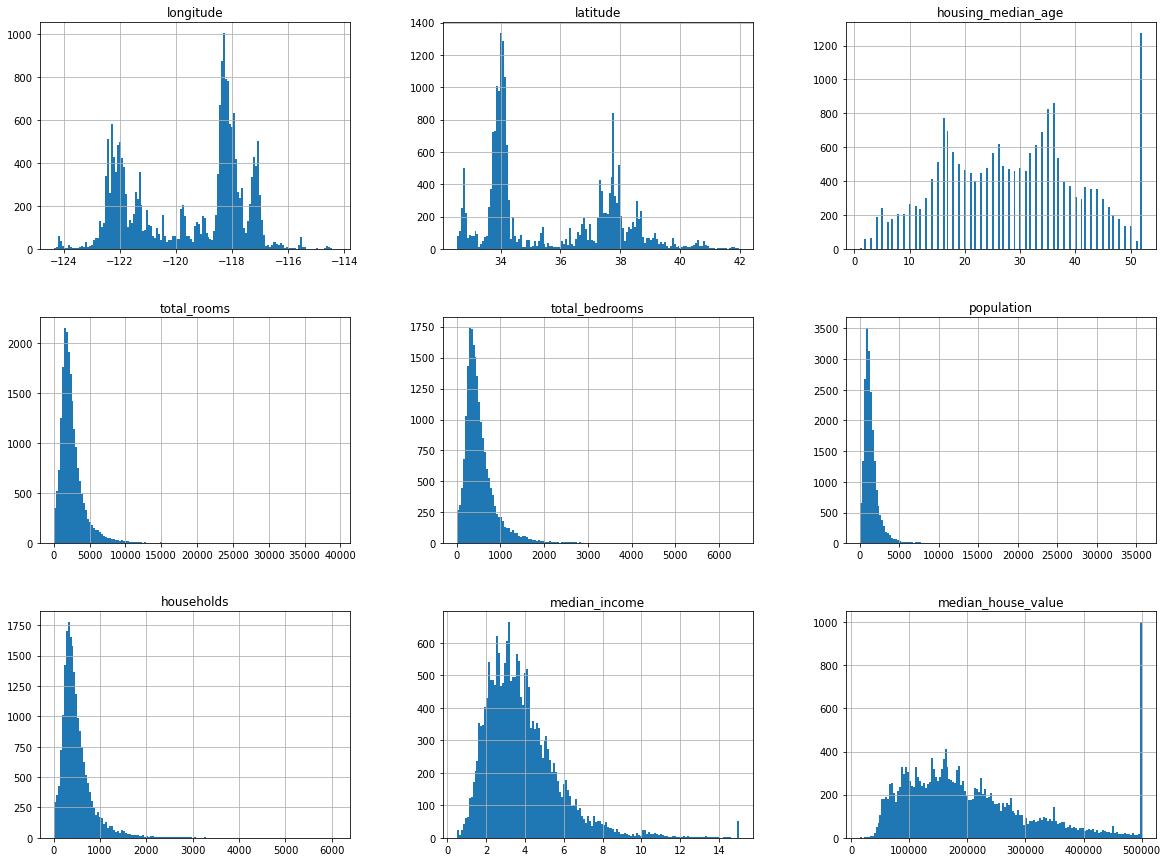

In [46]:
%matplotlib inline
BINS= int(np.sqrt(len(df_house.index)))
df_house.hist(bins=BINS, figsize=(20, 15))

Vamos avaliar a correlação entre todas variáveis.

In [47]:
corr=df_house.corr()
corr.style.background_gradient(cmap='coolwarm')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


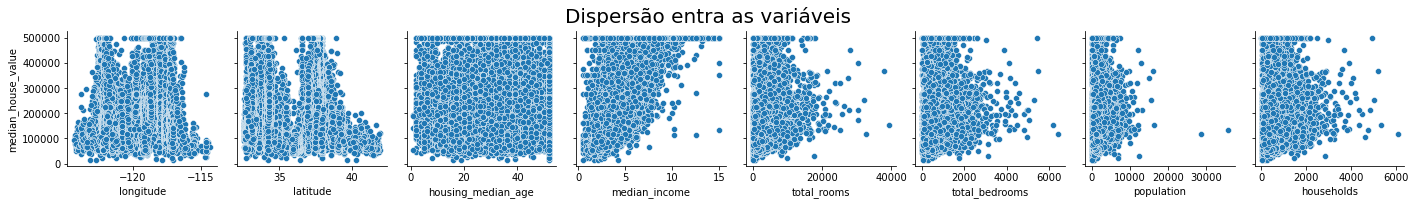

In [48]:
ax=sns.pairplot(df_house,y_vars='median_house_value', x_vars=['longitude','latitude','housing_median_age','median_income','total_rooms','total_bedrooms',"population","households"])
ax.fig.suptitle('Dispersão entra as variáveis', fontsize=20, y=1.1)
ax

Vamos visualizar melhor essas correlações entre a target e as features.

# <font color='red' style='font-size: 30px;'>3-Entendendo as variáveis</font>
<hr style='border: 2px solid red;'>

Agora pensando mais especificamente na nossa variável target, é possivel fazer uma analise genérica, que pode ajudar na melhora do nosso modelo, e assim relacionar uma linha de raciocínio com as features que temos disponíveis no nosso DataFrame. 

Assim, quais os principais fatores que podem influenciar no preço de uma casa?
- Localização: bem representado pela combinação da latitude e longititude, e a categoria "ocean_proximity", pois relaciona tanto a proximidade de cidades, quanto  tipo de casa.
- Tamanho: pode ser representado pela relação entre a quantidade de cômodos ("total_rooms") e a quantidade de casas de cada bloco ("households")

Agora quais sao os razões que influenciam na ponderação desses dois tópicos acima? Ou seja, o que faz o dono da casa querer uma certa localização, uma casa maior ou menor, de uma forma geral? 

- Estilo de vida. O morador prefere um lugar mais silencioso? Mais familiar? Mais agitado? Afastado ou central? Esse fator pode ser representado, de uma forma geral, pela idade dos moradores ("housing_median_age"). Além disso, o estilo de vida também se relaciona a quantos quartos existem em proporção com a quantidade de ambientes da casa. Pessoas mais jovens, por exemplo, tendem e morar em lugares mais centrais, e agitados, e com mais quartos por ambiente. Pessoas mais adultas e idosas, tendem a morar em lugares mais afastados e sossegados, com menos pessoas na casa, portanto com o ratio quarto/cômodo maior. Será que isso se comprova neste DataFrame?
- Quantidade de pessoas em uma casa: pode ser explicada pela relação entre a quantidade total de pessoas por bloco ("population") e o número total de casas ("households"). Além disso essa variável demonstra uma informação importante, a demanda por imóveis. Ou seja quanto maior a variável "population_per_households" mais pessoas vivem por casa, mostrando que talvez é necessário que houvessem mais casas nessa região, aumentando o preço do imóvel.

Por fim, e o principal, o que define se ela morará lá ou não?
- O quanto ela pode a pagar: definido pela feature "median_income"

Portanto vamos reestruturar nosso Dataframe, de modo que ele represente essa linha de raciocínio da melhor forma.

In [49]:
#criando uma coluna de quartos por casa 
df_house["rooms_per_household"] = df_house["total_rooms"]/df_house["households"]
#agora criando uma coluna de pessoas por casa
df_house["population_per_household"] = df_house["population"]/df_house["households"]
#agora criando uma coluna de ambiente quartos por ambiente
df_house["bedrooms_per_rooms"] = df_house["total_bedrooms"]/df_house["total_rooms"]
#agora apagando as colunas de "total_rooms", "total bedrooms", "households" e "population", já que seus valores estão relacionados com as novas colunas.
df_house=df_house.drop(["population", "households" ,"total_rooms", "total_bedrooms"], axis=1)

df_house.head()



,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


Vamos rever as correlações.

In [50]:
corr=df_house.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_rooms
longitude,1.000000,-0.924664,-0.108197,-0.015176,-0.045967,-0.027540,0.002476,0.092657
latitude,-0.924664,1.000000,0.011173,-0.079809,-0.144160,0.106389,0.002366,-0.113815
housing_median_age,-0.108197,0.011173,1.000000,-0.119034,0.105623,-0.153277,0.013191,0.136089
median_income,-0.015176,-0.079809,-0.119034,1.000000,0.688075,0.326895,0.018766,-0.615661
median_house_value,-0.045967,-0.144160,0.105623,0.688075,1.000000,0.151948,-0.023737,-0.255880
rooms_per_household,-0.027540,0.106389,-0.153277,0.326895,0.151948,1.000000,-0.004852,-0.416952
population_per_household,0.002476,0.002366,0.013191,0.018766,-0.023737,-0.004852,1.000000,0.002938
bedrooms_per_rooms,0.092657,-0.113815,0.136089,-0.615661,-0.255880,-0.416952,0.002938,1.000000


É possivel ver que as as novas variáveis, tem uma correlacao melhor quando combinadas pelas variáveis que foram excluídas. Agora as mais correlacionadas com target são:
- latitude
- house median age
- median income
- rooms per household
- bedrooms per room

Visualizando os scatterplots das nossas features em relação à target. É possível ver que há valores que distoam dos outros, vamos retirar esses outliers nas colunas de "rooms_per_household", "population_per_household" e "bedrooms_per_rooms"

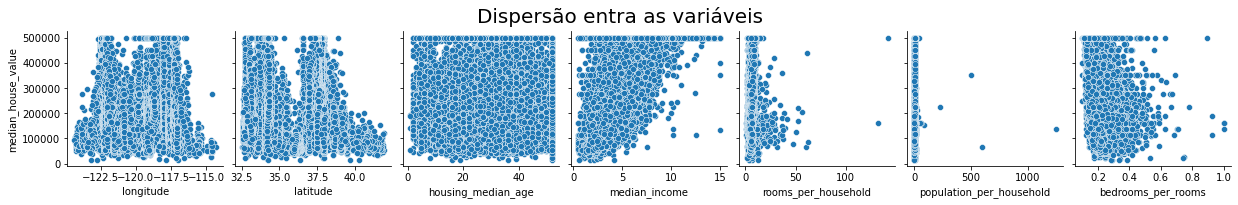

In [51]:
ax=sns.pairplot(df_house,y_vars='median_house_value', x_vars=['longitude','latitude','housing_median_age','median_income','rooms_per_household','population_per_household',"bedrooms_per_rooms"])
ax.fig.suptitle('Dispersão entra as variáveis', fontsize=20, y=1.1)
ax

Vamos tentar selecionar uma faixa de valores que estas features possuem uma distribuição normal, pois quando os dados estão assim, tendem a ter uma boa modelagem.

<AxesSubplot:ylabel='Frequency'>

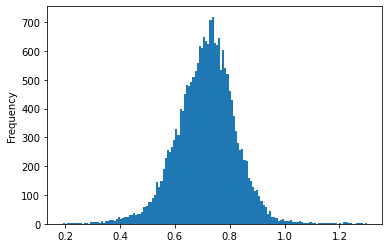

In [52]:
#verificando a distribuição normal entre uma faixa de valores
(
    df_house[
        (df_house['rooms_per_household'] < 20) &
        (df_house['rooms_per_household'] > 1.5)
    ]
    ["rooms_per_household"]
    .apply(np.log10)
    .plot.hist(
        bins=int(np.sqrt(len(df_house["rooms_per_household"])))
    )
)

In [53]:
#quantos outliers existem nessa faixa de valores.
df_house[(df_house['rooms_per_household'] > 20) |
        (df_house['rooms_per_household'] < 1.5)].loc[:, 'rooms_per_household'].count()

78

<AxesSubplot:ylabel='Frequency'>

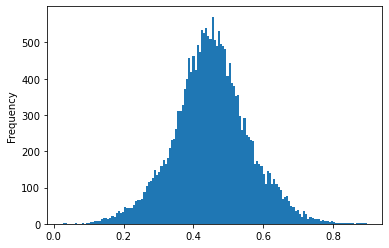

In [54]:
#verificando a distribuição normal entre uma faixa de valores
(
    df_house[
        (df_house['population_per_household'] < 8) &
        (df_house['population_per_household'] > 1)
    ]
    ["population_per_household"]
    .apply(np.log10)
    .plot.hist(
        bins=int(np.sqrt(len(df_house["population_per_household"])))
    )
)

In [55]:
#quantos outliers existem nesta faixa de valores.
df_house[(df_house['population_per_household'] > 20) |
        (df_house['population_per_household'] < 1.5)].loc[:, 'population_per_household'].count()

162

<AxesSubplot:ylabel='Frequency'>

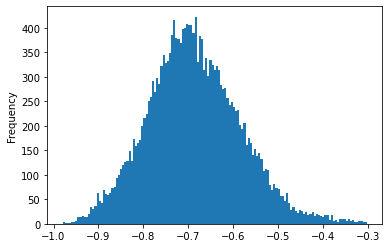

In [56]:
#verificando a distribuição normal entre uma faixa de valores
(
    df_house[
        (df_house['bedrooms_per_rooms'] < 0.5) &
        (df_house['bedrooms_per_rooms'] > 0.1)
    ]
    ["bedrooms_per_rooms"]
    .apply(np.log10)
    .plot.hist(
        bins=int(np.sqrt(len(df_house["bedrooms_per_rooms"])))
    )
)

In [57]:
#quantos outliers existem nesta faixa de valores.
df_house[(df_house['bedrooms_per_rooms'] > 0.5) |
        (df_house['bedrooms_per_rooms'] < 0.1)].loc[:, 'bedrooms_per_rooms'].count()

66

## Remoção de certos outliers

Vamos remover os outliers identificados acima.

In [58]:
df_house.drop(df_house[df_house['rooms_per_household'] > 20].index, inplace = True)
df_house.drop(df_house[df_house['rooms_per_household'] < 1.5].index, inplace = True)
df_house.drop(df_house[df_house['population_per_household'] > 8].index, inplace = True)
df_house.drop(df_house[df_house['population_per_household'] < 1].index, inplace = True)
df_house.drop(df_house[df_house['bedrooms_per_rooms'] > 0.5].index, inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20452 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20452 non-null  float64
 1   latitude                  20452 non-null  float64
 2   housing_median_age        20452 non-null  float64
 3   median_income             20452 non-null  float64
 4   median_house_value        20452 non-null  float64
 5   ocean_proximity           20452 non-null  object 
 6   rooms_per_household       20452 non-null  float64
 7   population_per_household  20452 non-null  float64
 8   bedrooms_per_rooms        20245 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.6+ MB


Vamos aplicar o log nas variáveis que foram removidos os outliers.

In [59]:
df_house['rooms_per_household'] = df_house['rooms_per_household'].apply(np.log10)
df_house['population_per_household'] = df_house['population_per_household'].apply(np.log10)
df_house['bedrooms_per_rooms'] = df_house['bedrooms_per_rooms'].apply(np.log10)



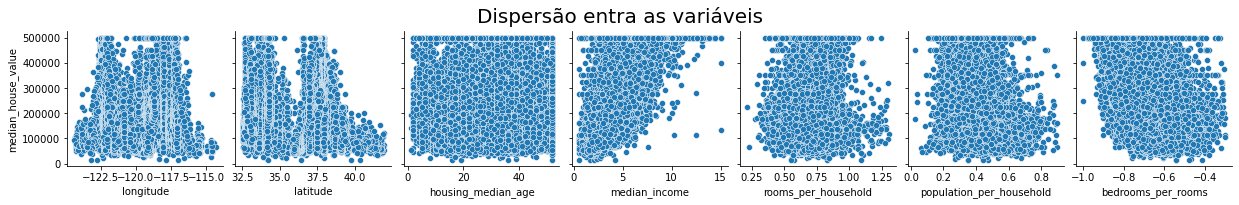

In [60]:
ax=sns.pairplot(df_house,y_vars='median_house_value', x_vars=['longitude','latitude','housing_median_age','median_income','rooms_per_household','population_per_household',"bedrooms_per_rooms"])
ax.fig.suptitle('Dispersão entra as variáveis', fontsize=20, y=1.1)
ax

# <font color='red' style='font-size: 30px;'>4-Explorando as features</font>
<hr style='border: 2px solid red;'>

Agora vamos explorar um pouco mais as features do nosso modelo, tentando explicar, exemplificar e comprovar a linha de raciocínio acima, com a nossa target.

## LOCALIZAÇÃO DO IMÓVEL

Vamos visualizar a localização de cada imóvel, segundo a característica "ocean_proximity".

c:\Users\joaob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


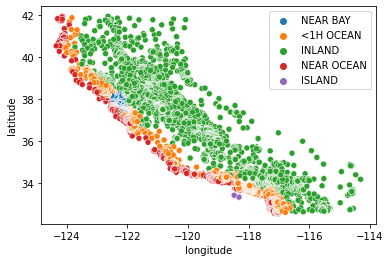

In [61]:
#vamos verificar onde se encontra cada categoria
sns.scatterplot('longitude', 'latitude', data=df_house, hue='ocean_proximity')

plt.legend()

Como dito antes, a localização do imóvel influencia bastante o valor do mesmo. Isso pode ser visto no gráfico abaixo onde os imóvies mais caros estao proximos ao ocenao, além de estarem próximos das grandes cidades como São Francisco, Los Angeles, San Diego e Sacramento.

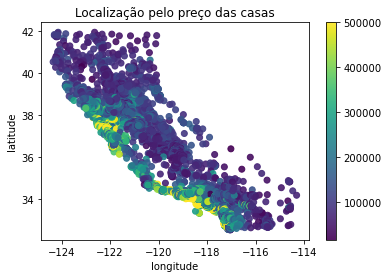

In [62]:
plt.scatter(df_house["longitude"], df_house["latitude"], c=df_house["median_house_value"], cmap='viridis', alpha=0.9)
plt.colorbar()
plt.title("Localização pelo preço das casas")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

![SNOWFALL](calimap.jpeg "Mapa da California")


## TAMANHO DO IMÓVEL


Vamos rever o segundo grande fator que influencia o valor das casas, o seu tamanho.

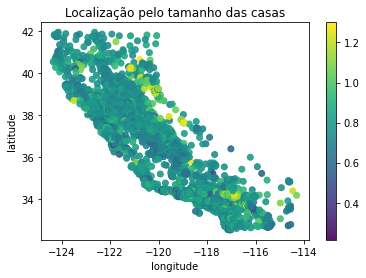

In [63]:
plt.scatter(df_house["longitude"], df_house["latitude"], c=df_house["rooms_per_household"], cmap='viridis', alpha=0.9)
plt.colorbar()
plt.title("Localização pelo tamanho das casas")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

Vamos visualizar a relação do preço das casas e o tamanho das casas, com a proximidade do oceano. 

c:\Users\joaob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>

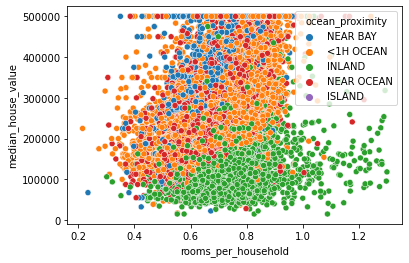

In [66]:
sns.scatterplot('rooms_per_household', 'median_house_value', data=df_house, hue="ocean_proximity")


Se vê que as maiores casas estão localizadas em "Inland", mais longe do oceano.

## ESTILO DE VIDA DOS MORADORES

O estilo de vida dos moradores, como dito na linha de raciocionio, genereciamente exeplifica uma ponderação da escolha do seu imóvel. Isto é, o que vale mais a pena pagar mais, uma localização melhor ou uma casa maior? Vamos tentar explorar essa pergunta.

Vamos ver onde vivem os moradores por uma faixa de idade dividida entre Jovens(0-18 anos), Jovens Adultos(19-33) e Adultos (34 pra cima).

In [67]:
# separando as idades em categorias
lista=[]
subset=pd.DataFrame()
for i in df_house["housing_median_age"]:
    if i<19:
        lista.append("JOVEM")
    if i>=19 and i<34:
        lista.append("JOVEM ADULTO")
    if i>=34:
        lista.append("ADULTO")
        #subset["IDADE"]="JOVEM"
subset["IDADE"]=lista



c:\Users\joaob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


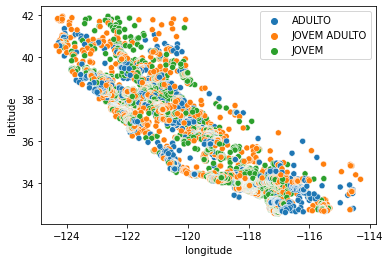

In [68]:
sns.scatterplot('longitude', 'latitude', data=df_house, hue=subset["IDADE"])

plt.legend()

Vamos plotar quanto de cada idade mora em cada região usando um histograma.

Text(0.5, 1.0, 'Estilo de pessoas por região')

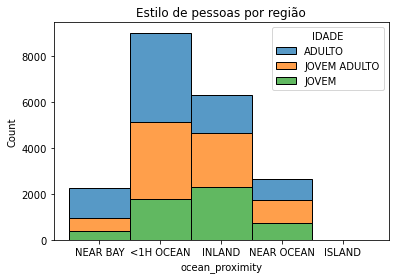

In [69]:
sns.histplot(binwidth=0.5, x="ocean_proximity", hue=subset["IDADE"], data=df_house, stat="count", multiple="stack")
plt.title("Estilo de pessoas por região")

c:\Users\joaob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


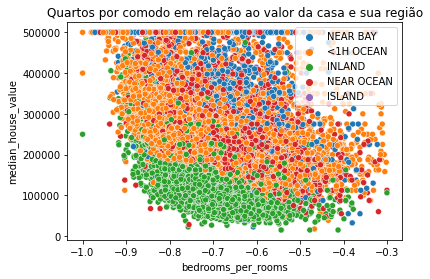

In [70]:
sns.scatterplot('bedrooms_per_rooms', 'median_house_value', data=df_house, hue="ocean_proximity")
plt.title("Quartos por comodo em relação ao valor da casa e sua região")
plt.legend()

c:\Users\joaob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


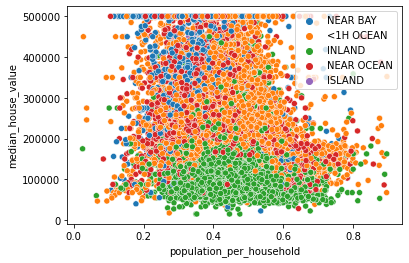

In [71]:
sns.scatterplot('population_per_household', 'median_house_value', data=df_house, hue="ocean_proximity")

plt.legend()

## RENDA

A classe social está relacionada a quanto os moradores tem de poder aquisitivo. A váriavel que demonstra isso é o "median_income", que tem uma correlação de 68% com a variável target. Vamos explorar um pouco.

Vamos ver onde estão os moradores com maior income.

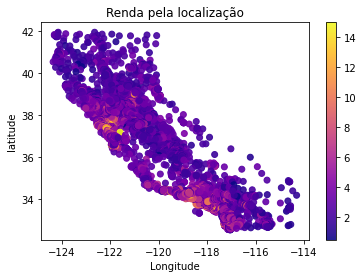

In [72]:
plt.scatter(df_house["longitude"], df_house["latitude"], c=df_house["median_income"], cmap='plasma', alpha=0.9)
plt.colorbar()
plt.title("Renda pela localização")
plt.xlabel("Longitude")
plt.ylabel("latitude")

plt.show()



c:\Users\joaob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


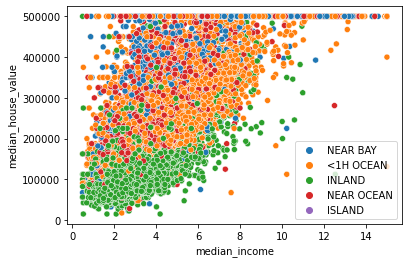

In [73]:
sns.scatterplot('median_income', 'median_house_value', data=df_house, hue="ocean_proximity")

plt.legend()

Eles estão localizados justamente nas maiores cidades, e próximos ao mar.

Portanto, é possível ver que os gráficos comprovam essas linha de raciocínio para estimar o nosso modelo. 
- Imóveis com 



Agora vamos testar nosso modelo.

Agora vamos analisar as nossas premissas com os nossos gráficos.


Os principais fatores que podem influenciar no preço de uma casa definidos antes são:
- Localização: Como visto nos gráficos, a localização influencia bastante no valor da casa, tanto que perto das cidades e proximo ao oceano as casas tem um valor bem mais alto.
- Tamanho: Um contraponto à localização, as maiores casas não são as que tem maior valor, e essas estão presentes mais longe da costa.

Então, em relação as razões com que fazem os moradores de cada lugar escolherem este imóvel:
-Estilo de vida. A idade dos moradores da casa não tem muita influencia no valor da casa, mas existe mais moradores na região 'proximos a bahia' de adultos e no interior jovens. Além disso, quando analizado o número de quartos por ambiente junto com a região do imóvel é possível ter uma melhor noção do valor da casa estimado.
-A quantidade de pessoas em uma casa. Também é possível concluir que se há mais pessoas vivendo em uma casa, o valor da casa é menor.
Por fim, em relação a feature mais determinante, a renda de cada indivíduo é diretamente proporcional ao valor da casa.


# <font color='red' style='font-size: 30px;'>5-Treino e Teste</font>
<hr style='border: 2px solid red;'>

Separando o DataFrame entre treino e teste. Sendo X as variáveis explicativas e Y a variável target.

In [74]:
y = df_house.loc[:,"median_house_value"]
X = df_house.drop(["median_house_value"], axis=1)


In [75]:
RAND_SEED=42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,                  
    test_size=0.2,
    random_state=RAND_SEED,
)

Verificando a separação do treino e teste.

In [76]:
X_train.shape[0] + X_test.shape[0]

20452

Separando o X_train entre um DataFrame categórico e um numérico.

In [77]:
X_train_num = X_train.drop(["ocean_proximity"], axis=1)
X_train_cat = X_train.loc[:,"ocean_proximity"]

Será necessario verificar se há valores NaN no DataFrame:

In [78]:
df_house.isnull().sum()


longitude                     0
latitude                      0
housing_median_age            0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
population_per_household      0
bedrooms_per_rooms          207
dtype: int64

Assim os valores NaN serão subsituidos pela mediana (pois representa uma parcela pequena dos dados, então nao influenciará na modelagem) da sua feature. Outra mudança necessária é padronizar a escala das features, pois cada um tem um range diferente. Além disso, a variavel categórica será transformada numa matriz de 5 elementos binários, demonstrando se existe tal característica da ocean_proximity, 1,  ou não, 0.

In [79]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler() #padroniza a escala

num_pipeline = Pipeline([
    ('imputer', imputer),
    ('std_scaler', scaler),
])

one_hot_encoder = OneHotEncoder(sparse=False) #coloca numa matriz binária a variável categórica

cat_pipeline = Pipeline([
    ('cat_encoder', one_hot_encoder),
])

num_attribs = list(X_train_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

Aplicando as mudanças no dataframe de treino e de teste das features:

In [80]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

# <font color='red' style='font-size: 30px;'>6-Aplicação modelos de regressão</font>
<hr style='border: 2px solid red;'>

Linear Regression

In [81]:
lr = LinearRegression()
lr.fit(X_train_prepared, y_train)

LinearRegression()

Decision Tree Regressor

In [82]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_prepared, y_train)

DecisionTreeRegressor(random_state=42)

Random Forest Regressor

In [83]:
rf = RandomForestRegressor(random_state=42)
#treinamento
rf.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

Gradient Boosting Regressor

In [84]:
gb = GradientBoostingRegressor(random_state=42)
#treinamento
gb.fit(X_train_prepared, y_train)

GradientBoostingRegressor(random_state=42)

XGBRF Regressor

In [85]:
xg = XGBRFRegressor(random_state=42)
#treinamento
xg.fit(X_train_prepared, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', max_bin=256, max_cat_threshold=64,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=42,
               reg_alpha=0, ...)

# <font color='red' style='font-size: 30px;'>7-Cross-Validation</font>
<hr style='border: 2px solid red;'>

O cross validation serve para treinar o modelo, separando o próprio DataFrame de treino em algumas partes, deixando uma delas para teste. Vamos fazer o cross validation com todos os modelos testados e observar o ROOT MEAN SQUARED ERROR e o seu R2 (proximidade com a modelo original).

In [86]:
#CrossVal Linear Regression
lr_scores = cross_val_score(
    lr,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

lr_scoresr2 = cross_val_score(
    lr,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
lr_scoresr2mean=lr_scoresr2.mean()
lr_rmse_scores = np.sqrt(-lr_scores)

In [87]:
#CrossVal Decision Trees
dt_scores = cross_val_score(
    dt,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


dt_scoresr2 = cross_val_score(
    dt,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
dt_scoresr2mean=dt_scoresr2.mean()

dt_rmse_scores = np.sqrt(-dt_scores)

In [88]:
#CrossVal Random Forest
rf_scores = cross_val_score(
    rf,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


rf_scoresr2 = cross_val_score(
    rf,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
rf_scoresr2mean=rf_scoresr2.mean()

rf_rmse_scores = np.sqrt(-rf_scores)

In [89]:
#CrossVal Gradient Boosting
gb_scores = cross_val_score(
    gb,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


gb_scoresr2 = cross_val_score(
    gb,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
gb_scoresr2mean=gb_scoresr2.mean()

gb_rmse_scores = np.sqrt(-gb_scores)

In [90]:
#CrossVal XG Boost
xg_scores = cross_val_score(
    xg,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


xg_scoresr2 = cross_val_score(
    gb,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
xg_scoresr2mean=xg_scoresr2.mean()

xg_rmse_scores = np.sqrt(-xg_scores)

Vamos comparar os modelos em relação a variável RMSE.

<AxesSubplot:ylabel='RMSE $[\\mathtt{USD}]$'>

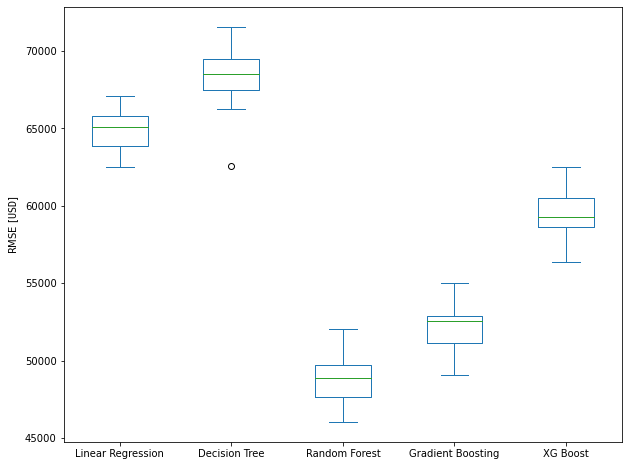

In [92]:
pd.DataFrame({
    'Linear Regression': lr_rmse_scores,
    'Decision Tree': dt_rmse_scores,
    'Random Forest': rf_rmse_scores,
    'Gradient Boosting': gb_rmse_scores,
    'XG Boost': xg_rmse_scores,
}).plot.box(
    xlabel='Regressor',
    ylabel=r'RMSE $[\mathtt{USD}]$',
    figsize=(10, 8),
)

Agora vamos comparar em relacão ao R2.

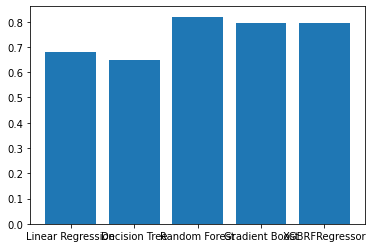

In [93]:
r2=[lr_scoresr2mean,dt_scoresr2mean,rf_scoresr2mean,gb_scoresr2mean,xg_scoresr2mean ]
plt.bar(["Linear Regression","Decision Tree","Random Forest","Gradient Boost","XGBRFRegressor"], height = r2)

plt.show()

É possivel ver que o Random Forest tem o menor RMSE e o maior R2 ao testar o DataFrame diversas vezes.

In [94]:
def display_scores(rmse, r2):
    print('Scores R2:', r2.round(decimals=2))
    print('Mean R2:', r2.mean())
    print('Standard deviation R2:', r2.std())
    print('Scores RMSE:', rmse.round(decimals=2))
    print('Mean RMSE:', rmse.mean())
    print('Standard deviation RMSE:', rmse.std())

In [96]:
display_scores(rf_rmse_scores, rf_scoresr2)

Scores R2: [0.82 0.82 0.82 0.8  0.84 0.8  0.82 0.83 0.83 0.81]
Mean R2: 0.8195809982153065
Standard deviation R2: 0.012997078369151156
Scores RMSE: [49414.68 48354.47 47446.21 49380.47 46029.93 52064.77 50306.73 48170.04
 47090.74 49810.09]
Mean RMSE: 48806.81465778705
Standard deviation RMSE: 1663.925520431679


# <font color='red' style='font-size: 30px;'>12-Otimizar o melhor modelo</font>
<hr style='border: 2px solid red;'>

Agora, vendo o resultado dos nossos modelos, vamos selecionar o melhor deles (Random Forest) e  através de recursos da biblioteca do sklearn, vamos ver quais os melhores features dele.

## F-Regression
Vai dar uma resposta de quais são os features que mais estão impactando no resultado da target, ou seja, a correlação. Como ele analisa relações lineares e no nosso modelo, esse é o nosso obejtivo, vamos usá-lo.  

In [97]:
f_reg = SelectKBest(f_regression, k=6)
f_reg

SelectKBest(k=6, score_func=<function f_regression at 0x000002AFAE101280>)

In [98]:
f_reg.fit(X_train_prepared, y_train)

SelectKBest(k=6, score_func=<function f_regression at 0x000002AFAE101280>)

In [99]:
f_reg_support = f_reg.get_support()
#f_feature = X_train_prepared.loc[:, f_reg_support].columns.tolist()
f_reg_support


array([False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False])

In [100]:
one_hot_encoder.fit(X[["ocean_proximity"]])
X_train_num.columns.tolist(), one_hot_encoder.categories_[0].tolist()

(['longitude',
  'latitude',
  'housing_median_age',
  'median_income',
  'rooms_per_household',
  'population_per_household',
  'bedrooms_per_rooms'],
 ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])

As melhores features são portanto,
- median income
- rooms_per_household
- population_per_household
- bedrooms_per_rooms
- inland ("ocean proximity")
- 1h ocean ("ocean proximity")

Vamos selecionar somente essas variáveis.

In [101]:
X_feat_sel = pd.DataFrame(X_train_prepared)
#transformando de volta pra array
X_train_prepared=X_feat_sel.drop([0,1,2,9,10,11], axis=1).to_numpy()

X_feat_sel2 = pd.DataFrame(X_test_prepared)
#transformando de volta pra array
X_test_prepared=X_feat_sel2.drop([0,1,2,9,10,11], axis=1).to_numpy()


Vamos rodar pela ultima vez o modelo para ver seu resultado.

# <font color='red' style='font-size: 30px;'>14-Terceira aplicação dos modelos</font>
<hr style='border: 2px solid red;'>

Linear Regression

In [102]:
lr = LinearRegression()
lr.fit(X_train_prepared, y_train)

LinearRegression()

Decision Tree Regressor

In [103]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_prepared, y_train)

DecisionTreeRegressor(random_state=42)

Random Forest Regressor

In [104]:
rf = RandomForestRegressor(random_state=42)
#treinamento
rf.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

Gradient Boosting Regressor

In [105]:
gb = GradientBoostingRegressor(random_state=42)
#treinamento
gb.fit(X_train_prepared, y_train)

GradientBoostingRegressor(random_state=42)

XGBRF Regressor

In [106]:
xg = XGBRFRegressor(random_state=42)
#treinamento
xg.fit(X_train_prepared, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', max_bin=256, max_cat_threshold=64,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=42,
               reg_alpha=0, ...)

# <font color='red' style='font-size: 30px;'>15-Cross-Validation</font>
<hr style='border: 2px solid red;'>

In [107]:
#CrossVal Linear Regression
lr_scores = cross_val_score(
    lr,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

lr_scoresr2 = cross_val_score(
    lr,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
lr_scoresr2mean=lr_scoresr2.mean()
lr_rmse_scores = np.sqrt(-lr_scores)

In [108]:
#CrossVal Decision Trees
dt_scores = cross_val_score(
    dt,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


dt_scoresr2 = cross_val_score(
    dt,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
dt_scoresr2mean=dt_scoresr2.mean()

dt_rmse_scores = np.sqrt(-dt_scores)

In [109]:
#CrossVal Random Forest
rf_scores = cross_val_score(
    rf,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


rf_scoresr2 = cross_val_score(
    rf,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
rf_scoresr2mean=rf_scoresr2.mean()

rf_rmse_scores = np.sqrt(-rf_scores)

In [110]:
#CrossVal Gradient Boosting
gb_scores = cross_val_score(
    gb,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


gb_scoresr2 = cross_val_score(
    gb,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
gb_scoresr2mean=gb_scoresr2.mean()

gb_rmse_scores = np.sqrt(-gb_scores)

In [111]:
#CrossVal XG Boost
xg_scores = cross_val_score(
    xg,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)


xg_scoresr2 = cross_val_score(
    gb,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='r2',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
xg_scoresr2mean=xg_scoresr2.mean()

xg_rmse_scores = np.sqrt(-xg_scores)

Vamos comparar os modelos em relação a variável RMSE.

<AxesSubplot:ylabel='RMSE $[\\mathtt{USD}]$'>

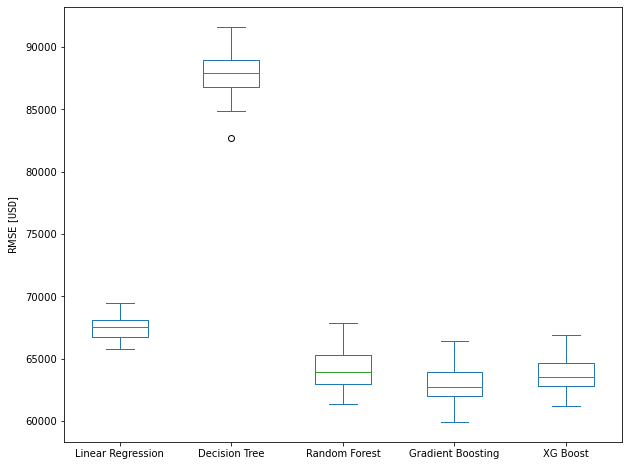

In [112]:
pd.DataFrame({
    'Linear Regression': lr_rmse_scores,
    'Decision Tree': dt_rmse_scores,
    'Random Forest': rf_rmse_scores,
    'Gradient Boosting': gb_rmse_scores,
    'XG Boost': xg_rmse_scores,
}).plot.box(
    xlabel='Regressor',
    ylabel=r'RMSE $[\mathtt{USD}]$',
    figsize=(10, 8),
)

Agora vamos comparar em relacão ao R2.

<AxesSubplot:ylabel='R2]$'>

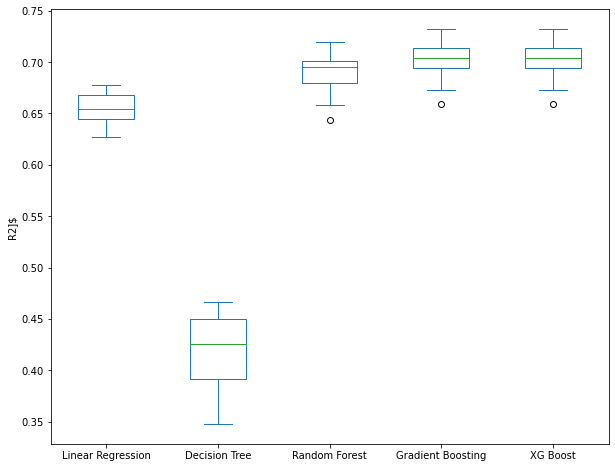

In [113]:
pd.DataFrame({
    'Linear Regression': lr_scoresr2,
    'Decision Tree': dt_scoresr2,
    'Random Forest': rf_scoresr2,
    'Gradient Boosting': gb_scoresr2,
    'XG Boost': xg_scoresr2,
}).plot.box(
    xlabel='Regressor',
    ylabel=r'R2]$',
    figsize=(10, 8),
)

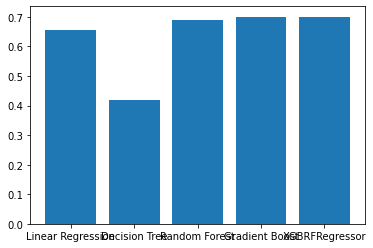

In [114]:
r2=[lr_scoresr2mean,dt_scoresr2mean,rf_scoresr2mean,gb_scoresr2mean,xg_scoresr2mean ]
plt.bar(["Linear Regression","Decision Tree","Random Forest","Gradient Boost","XGBRFRegressor"], height = r2)

plt.show()

É possivel ver que o selecionando as features o Gradient Boost se tornou o melhor modelo.

In [115]:
def display_scores(rmse, r2):
    print('Scores R2:', r2.round(decimals=2))
    print('Mean R2:', r2.mean())
    print('Standard deviation R2:', r2.std())
    print('Scores RMSE:', rmse.round(decimals=2))
    print('Mean RMSE:', rmse.mean())
    print('Standard deviation RMSE:', rmse.std())

In [116]:
display_scores(gb_rmse_scores, gb_scoresr2)

Scores R2: [0.71 0.7  0.69 0.66 0.73 0.67 0.71 0.72 0.72 0.7 ]
Mean R2: 0.700713411050636
Standard deviation R2: 0.02048156140967047
Scores RMSE: [62707.23 61822.3  62816.55 64341.25 59913.92 66415.27 64227.06 62601.12
 60674.1  63073.08]
Mean RMSE: 62859.1875832672
Standard deviation RMSE: 1771.2958089127817


Selecionando somente 6 features de um total de 12 (somando as numéricas e as categóricas), o random forest atingiu 90% de seu valor quando usado todas as features

# <font color='red' style='font-size: 30px;'>16-Tuning de Hiperparâmetros</font>
<hr style='border: 2px solid red;'>


Os parâmetros são os componentes do modelo que são aprendidos durante o processo de treinamento e nunca podemos defini-los manualmente. Um modelo inicia o processo de treinamento com valores de parâmetros aleatórios e os ajusta por toda parte. Já os hiperparâmetros são os componentes definidos por você antes do treinamento do modelo. Os valores dos hiperparâmetros podem melhorar ou piorar a precisão do seu modelo.

### Grid Search

O Grid Search é uma das formas de fazer o tuning de hiperparâmetros, ele é fácil de implementar para encontrar o melhor modelo dentro da grade. Vamos usá-lo par aver qual os melhores hiperaparâmetros para nosso modelo escolhido (Random Forest). Depois disso, usando esses valores vamos ver qual é o score do nosso modelo.

In [117]:
modelo = rf

In [118]:

grid_dict = {
    'n_estimators':[2,5,10,25,50,100,250,500,550],
    'random_state':[42],
    'max_depth':[2,5,10,20,25,50,75,100]
}

In [119]:
grid = GridSearchCV(modelo, grid_dict, cv=2)


Esse demora bastante tempo

In [120]:
grid.fit(X_train_prepared, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_score_

0.6972235519380794

In [ ]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 500, 'random_state': 42}

In [ ]:
result_y = grid.predict(X_test_prepared)

In [ ]:
result_y = pd.DataFrame(result_y, columns=['resultadoModelo'])

In [ ]:
r2_score(y_test, result_y)

0.6903760568633529